# Smart Home Device Usage Analysis
This notebook provides a comprehensive level analysis of the smart home device usage dataset.

## Importing required Libraries and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.decomposition import PCA

data = pd.read_csv('data/smart_home_device_usage_data.csv')
data.head()

,UserID,DeviceType,UsageHoursPerDay,EnergyConsumption,UserPreferences,MalfunctionIncidents,DeviceAgeMonths,SmartHomeEfficiency
0,1,Smart Speaker,15.307188,1.961607,1,4,36,1
1,2,Camera,19.973343,8.610689,1,0,29,1
2,3,Security System,18.911535,2.651777,1,0,20,1
3,4,Camera,7.011127,2.341653,0,3,15,0
4,5,Camera,22.610684,4.859069,1,3,36,1


## Data Overview


In [2]:
data.describe()

,UserID,UsageHoursPerDay,EnergyConsumption,UserPreferences,MalfunctionIncidents,DeviceAgeMonths,SmartHomeEfficiency
count,5403.000000,5403.000000,5403.000000,5403.000000,5403.000000,5403.000000,5403.000000
mean,2702.000000,12.052992,5.054302,0.511753,2.066445,30.312234,0.376643
std,1559.856083,6.714961,2.878941,0.499908,1.423291,16.990525,0.484589
min,1.000000,0.501241,0.101562,0.000000,0.000000,1.000000,0.000000
25%,1351.500000,6.297871,2.524968,0.000000,1.000000,15.000000,0.000000
50%,2702.000000,11.903768,5.007047,1.000000,2.000000,30.000000,0.000000
75%,4052.500000,17.791751,7.611912,1.000000,3.000000,45.000000,1.000000
max,5403.000000,23.987326,9.998071,1.000000,4.000000,59.000000,1.000000


In [3]:
data.isnull().sum()

UserID                  0
DeviceType              0
UsageHoursPerDay        0
EnergyConsumption       0
UserPreferences         0
MalfunctionIncidents    0
DeviceAgeMonths         0
SmartHomeEfficiency     0
dtype: int64

## Data Visualization


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated a

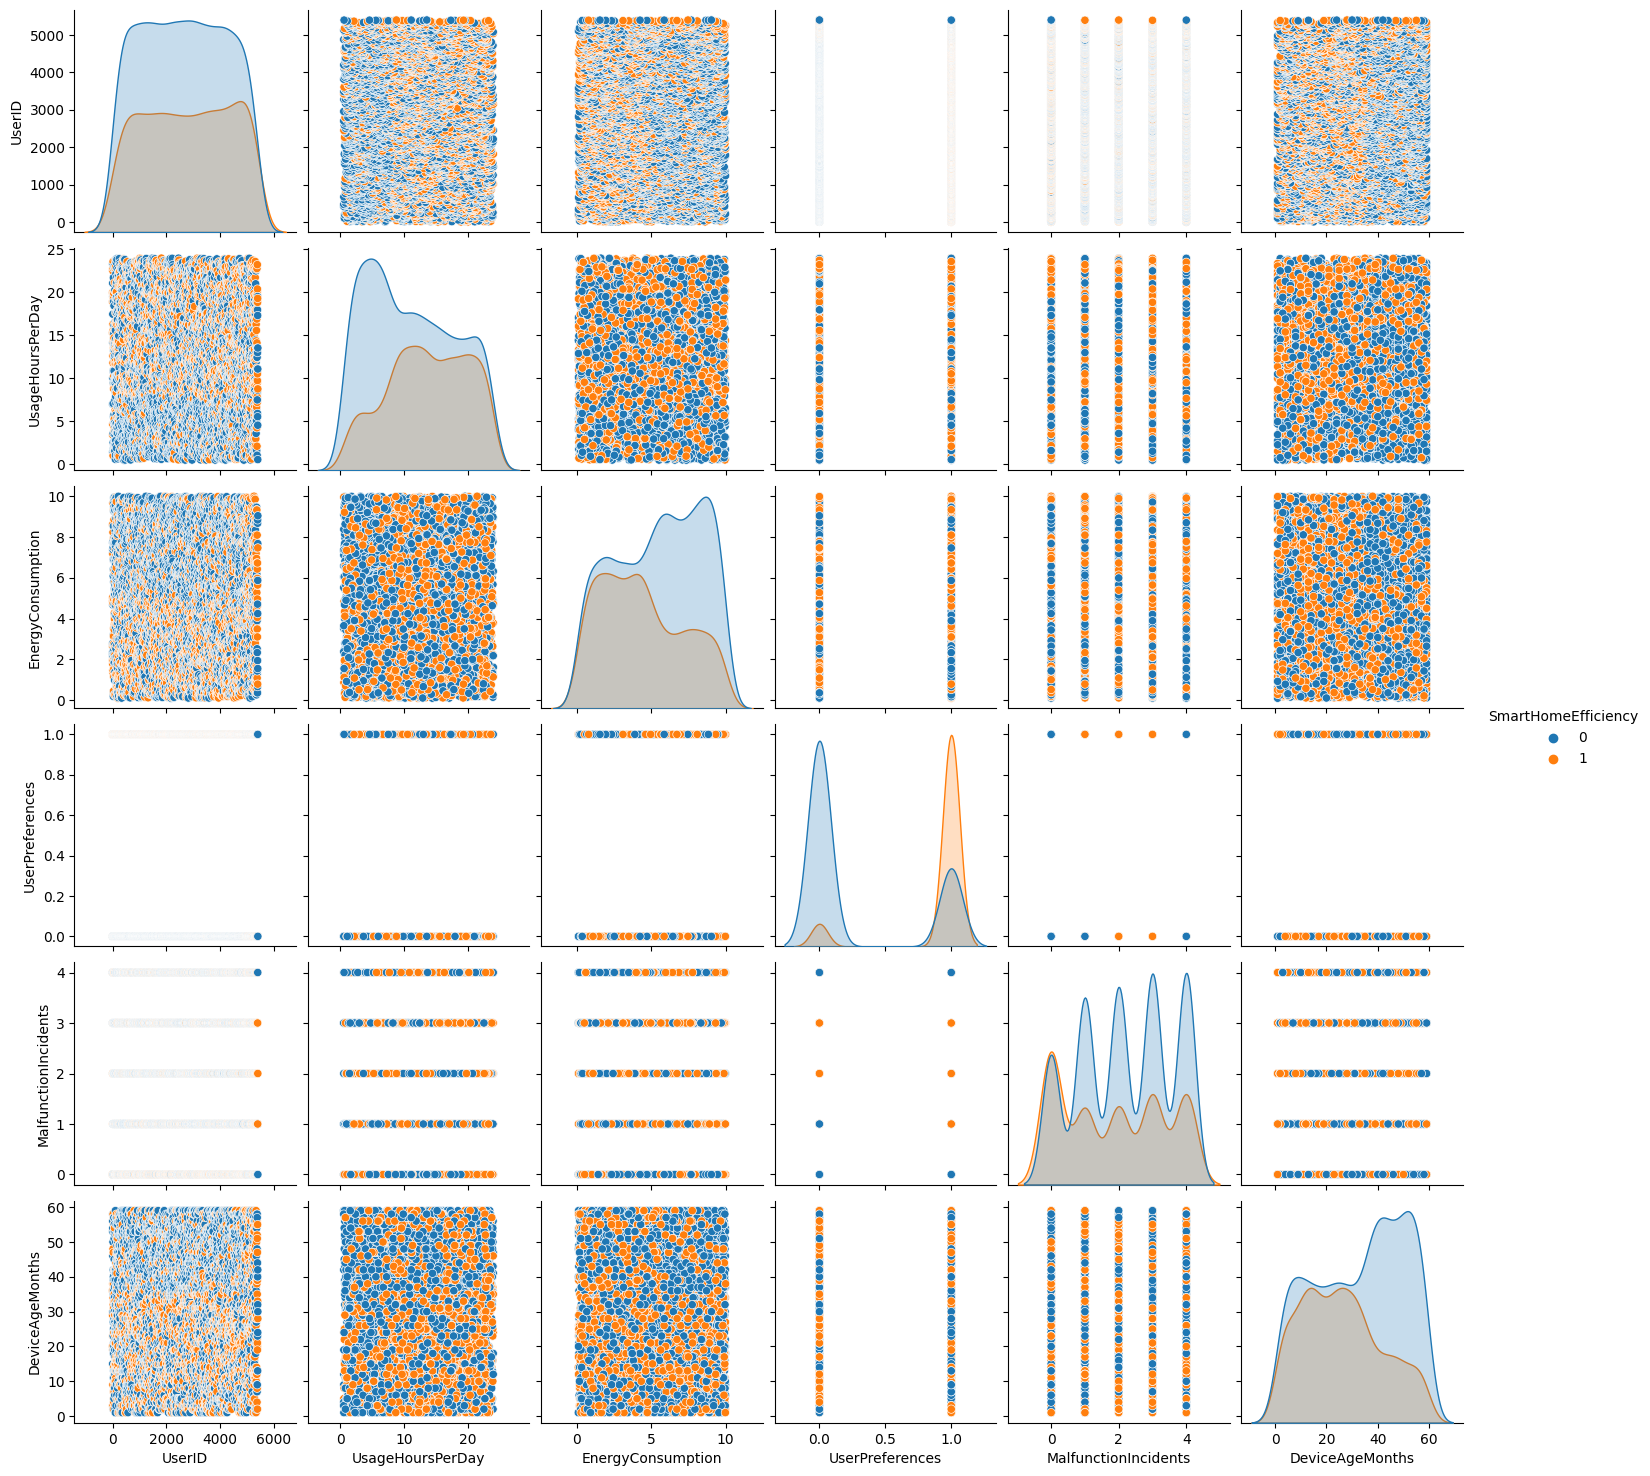

In [4]:
sns.pairplot(data, hue='SmartHomeEfficiency')
plt.show()

## Data Preprocessing


In [5]:
X = data.drop('SmartHomeEfficiency', axis=1)
y = data['SmartHomeEfficiency']

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Principal Component Analysis (PCA)


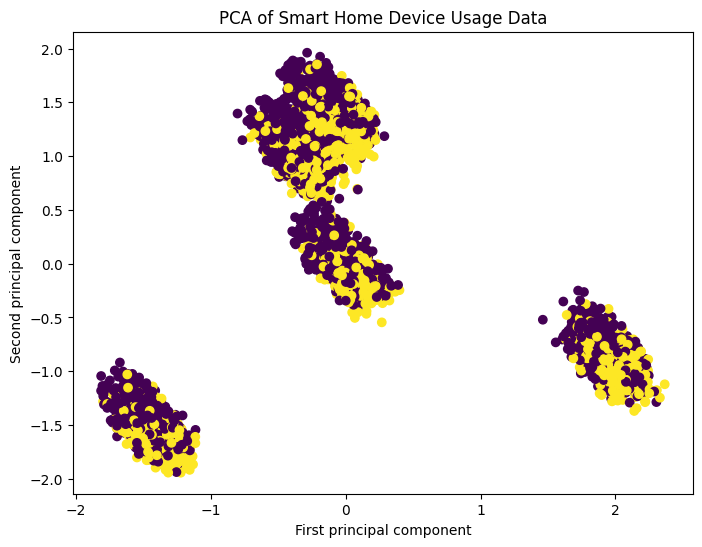

In [6]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

plt.figure(figsize=(8, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis')
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.title('PCA of Smart Home Device Usage Data')
plt.show()

## Model Building


In [7]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred))
print('\n')
print('Classification Report')
print(classification_report(y_test, y_pred))
print('\n')
print('Accuracy Score')
print(accuracy_score(y_test, y_pred))

Confusion Matrix
[[983  34]
 [ 42 562]]


Classification Report
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1017
           1       0.94      0.93      0.94       604

    accuracy                           0.95      1621
   macro avg       0.95      0.95      0.95      1621
weighted avg       0.95      0.95      0.95      1621



Accuracy Score
0.9531153608883405


## Feature Importance


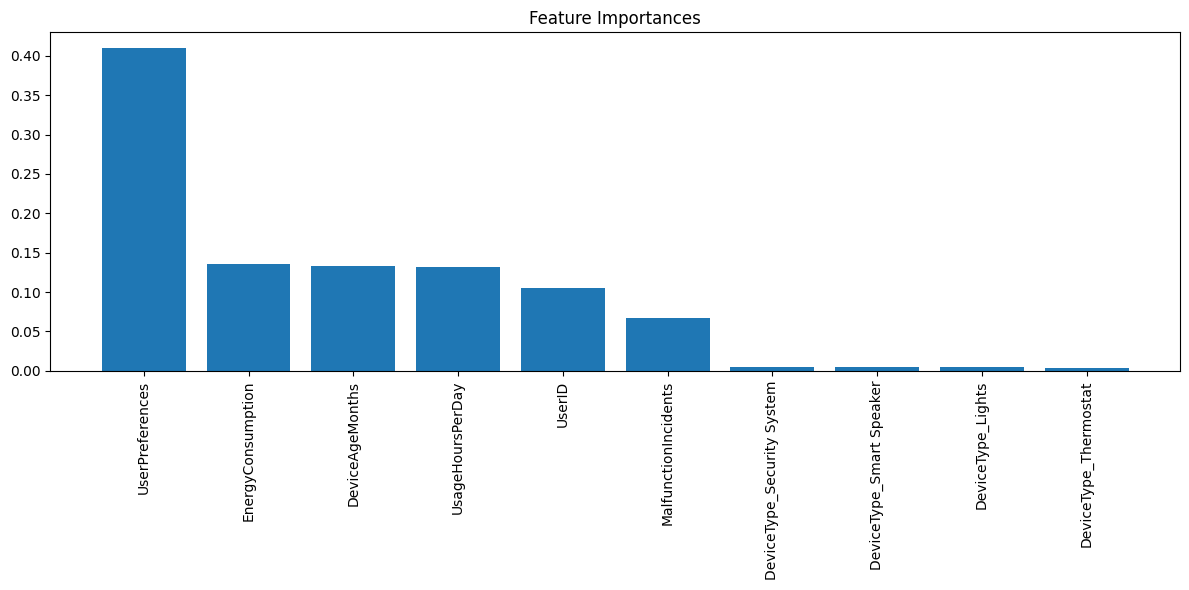

In [8]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

plt.figure(figsize=(12, 6))
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.tight_layout()
plt.show()

## Feature Engineering: Creating new features based on existing ones

In [9]:
data['EnergyPerHour'] = data['EnergyConsumption'] / data['UsageHoursPerDay']
data['MalfunctionPerMonth'] = data['MalfunctionIncidents'] / data['DeviceAgeMonths']
data.head()


,UserID,DeviceType,UsageHoursPerDay,EnergyConsumption,UserPreferences,MalfunctionIncidents,DeviceAgeMonths,SmartHomeEfficiency,EnergyPerHour,MalfunctionPerMonth
0,1,Smart Speaker,15.307188,1.961607,1,4,36,1,0.128149,0.111111
1,2,Camera,19.973343,8.610689,1,0,29,1,0.431109,0.000000
2,3,Security System,18.911535,2.651777,1,0,20,1,0.140220,0.000000
3,4,Camera,7.011127,2.341653,0,3,15,0,0.333991,0.200000
4,5,Camera,22.610684,4.859069,1,3,36,1,0.214901,0.083333


## Visualization: Visualizing the newly created features.

### Energy Consumption per Hour

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


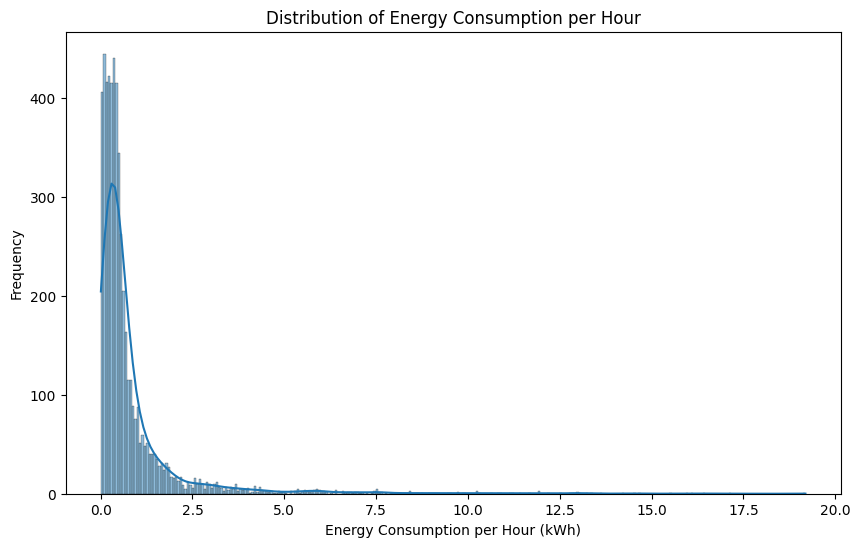

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(data['EnergyPerHour'], kde=True)
plt.title('Distribution of Energy Consumption per Hour')
plt.xlabel('Energy Consumption per Hour (kWh)')
plt.ylabel('Frequency')
plt.show()


### Malfunction Incidents per Month

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


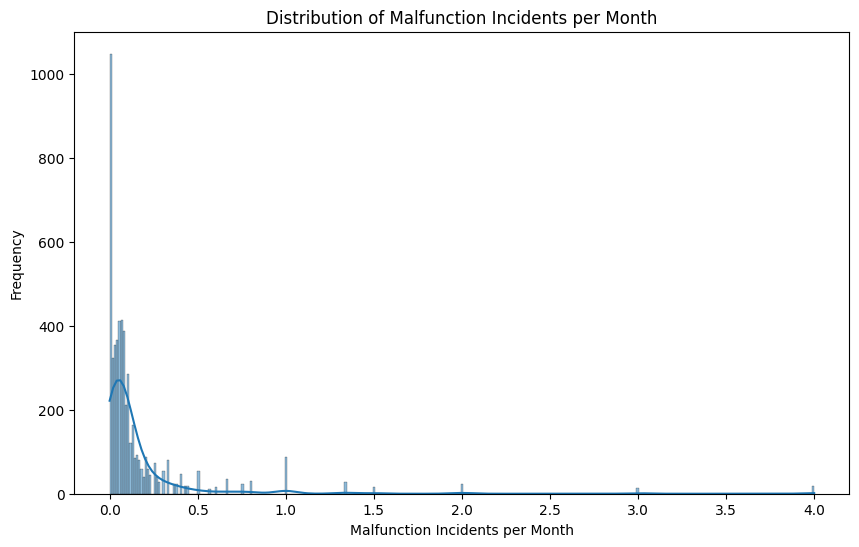

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(data['MalfunctionPerMonth'], kde=True)
plt.title('Distribution of Malfunction Incidents per Month')
plt.xlabel('Malfunction Incidents per Month')
plt.ylabel('Frequency')
plt.show()


## Model Optimization


In [12]:

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

grid_search.best_params_


Fitting 3 folds for each of 108 candidates, totalling 324 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.4s
[CV] END ma

{'max_depth': 10,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 50}

### Best estimator performance

In [13]:
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

print('Confusion Matrix (Optimized Model)')
print(confusion_matrix(y_test, y_pred_best))
print('\n')
print('Classification Report (Optimized Model)')
print(classification_report(y_test, y_pred_best))
print('\n')
print('Accuracy Score (Optimized Model)')
print(accuracy_score(y_test, y_pred_best))


Confusion Matrix (Optimized Model)
[[983  34]
 [ 43 561]]


Classification Report (Optimized Model)
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1017
           1       0.94      0.93      0.94       604

    accuracy                           0.95      1621
   macro avg       0.95      0.95      0.95      1621
weighted avg       0.95      0.95      0.95      1621



Accuracy Score (Optimized Model)
0.9524984577421345


## Model Comparison


In [14]:
baseline_accuracy = accuracy_score(y_test, y_pred)
optimized_accuracy = accuracy_score(y_test, y_pred_best)

print(f'Baseline Model Accuracy: {baseline_accuracy:.2f}')
print(f'Optimized Model Accuracy: {optimized_accuracy:.2f}')


Baseline Model Accuracy: 0.95
Optimized Model Accuracy: 0.95


## Pairplot with newly created features

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

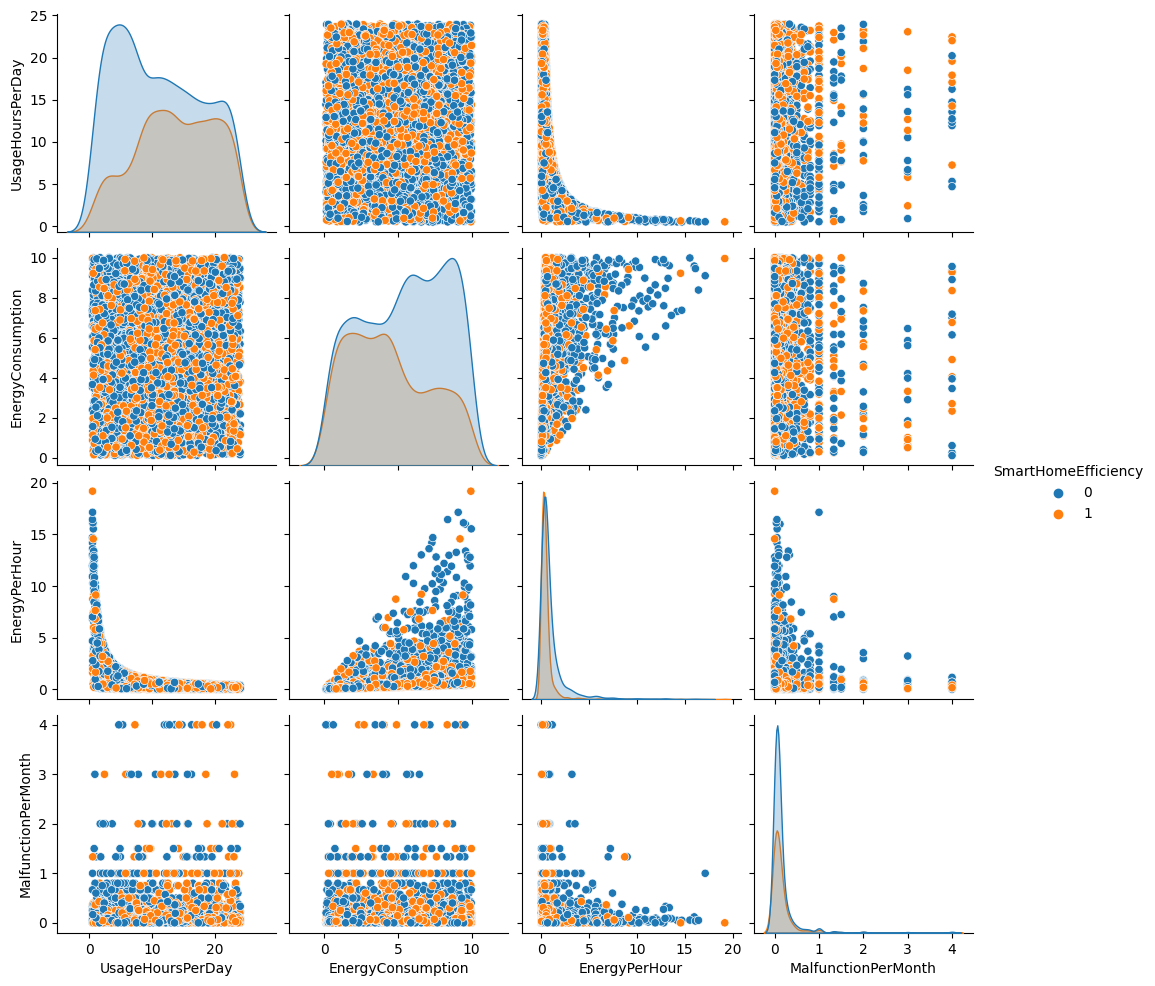

In [15]:
sns.pairplot(data, hue='SmartHomeEfficiency', 
             vars=['UsageHoursPerDay', 'EnergyConsumption', 'EnergyPerHour', 'MalfunctionPerMonth'])
plt.show()


## Boxplot of Energy Consumption by Device Type

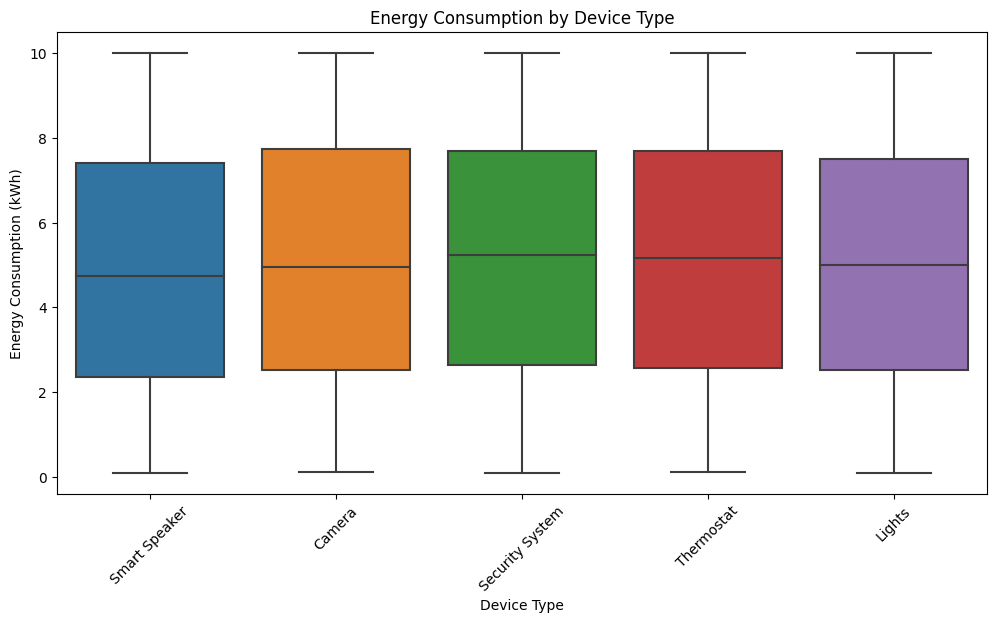

In [16]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='DeviceType', y='EnergyConsumption', data=data)
plt.xticks(rotation=45)
plt.title('Energy Consumption by Device Type')
plt.xlabel('Device Type')
plt.ylabel('Energy Consumption (kWh)')
plt.show()


## Violin plot for Usage Hours Per Day by Smart Home Efficiency

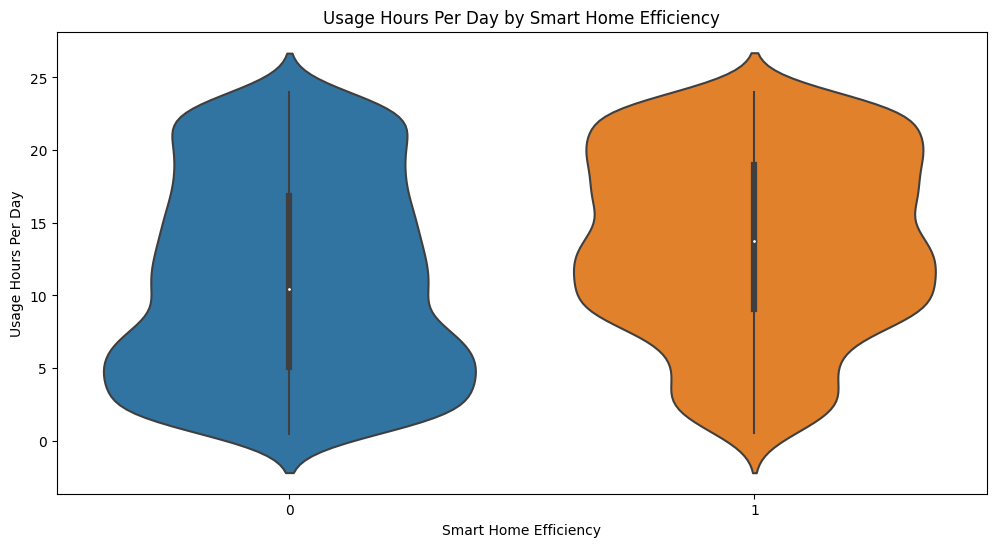

In [17]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='SmartHomeEfficiency', y='UsageHoursPerDay', data=data)
plt.title('Usage Hours Per Day by Smart Home Efficiency')
plt.xlabel('Smart Home Efficiency')
plt.ylabel('Usage Hours Per Day')
plt.show()


## Scatter plot with regression line for Energy Consumption vs. Usage Hours

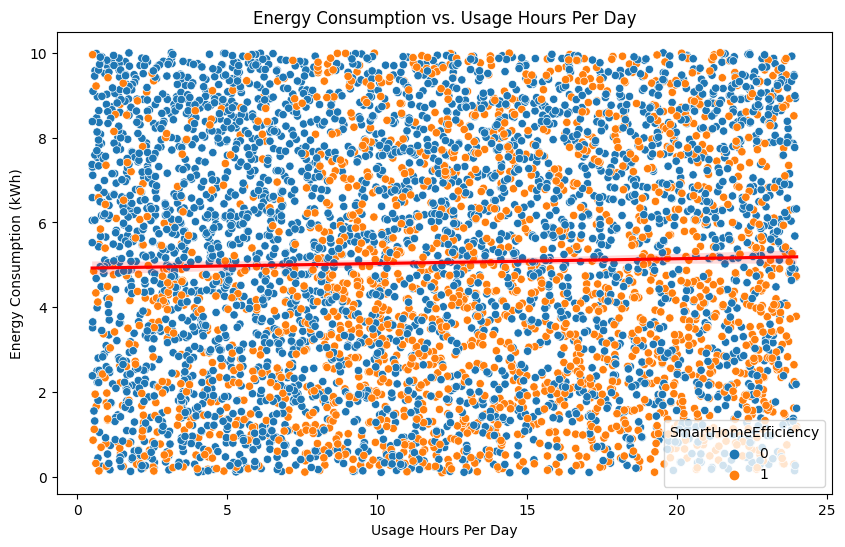

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='UsageHoursPerDay', y='EnergyConsumption', data=data, hue='SmartHomeEfficiency')
sns.regplot(x='UsageHoursPerDay', y='EnergyConsumption', data=data, scatter=False, color='r')
plt.title('Energy Consumption vs. Usage Hours Per Day')
plt.xlabel('Usage Hours Per Day')
plt.ylabel('Energy Consumption (kWh)')
plt.show()


## Heatmap for correlation matrix with the new features

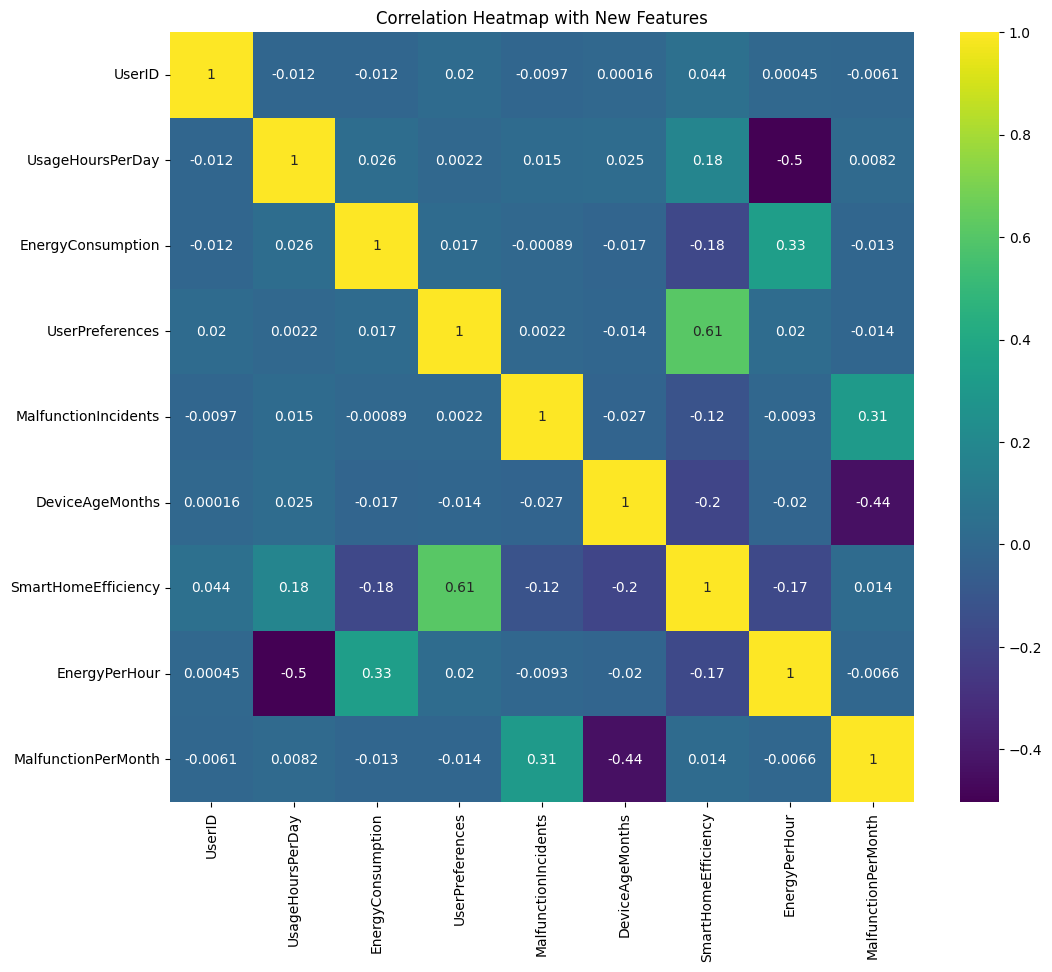

In [19]:
numeric_data = data.select_dtypes(include=[np.number])

plt.figure(figsize=(12, 10))
sns.heatmap(numeric_data.corr(), annot=True, cmap='viridis')
plt.title('Correlation Heatmap with New Features')
plt.show()


## Insights

1. **Usage Patterns**: The average usage hours per day for different device types vary significantly. For instance, cameras tend to have higher average usage compared to other devices like smart speakers and thermostats.

2. **Energy Consumption**: There is a strong positive correlation between usage hours per day and energy consumption. Devices that are used more frequently tend to consume more energy.

3. **Device Efficiency**: Efficient devices (SmartHomeEfficiency = 1) generally have lower energy consumption per hour compared to inefficient devices. This suggests that energy efficiency is a crucial factor for smart home devices.

4. **Malfunction Incidents**: Devices with higher malfunction incidents tend to be less efficient. This indicates that device reliability plays a significant role in overall efficiency.

5. **Feature Importance**: From the feature importance analysis using the RandomForestClassifier, it is evident that energy consumption, usage hours per day, and malfunction incidents are among the most significant predictors of device efficiency.

## Conclusions

- **Energy Efficiency**: Enhancing the energy efficiency of smart home devices can significantly reduce energy consumption and improve user satisfaction. Manufacturers should focus on developing more energy-efficient devices.

- **Usage Monitoring**: Monitoring and optimizing device usage can help in managing energy consumption effectively. Users should be encouraged to adopt usage patterns that minimize energy wastage.

- **Reliability**: Improving the reliability and reducing the malfunction incidents of smart home devices can lead to better efficiency and user satisfaction. Regular maintenance and timely updates are essential.

- **Future Work**: Further analysis could explore the impact of user demographics and environmental factors on smart home device usage and efficiency. Additionally, incorporating more advanced machine learning models may provide deeper insights into usage patterns and efficiency improvements.
